<a href="https://colab.research.google.com/github/ApahSaroj/WPI/blob/main/ANN_Comp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# scaling and train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# creating a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

# evaluation on test data
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/DATA/timeser.csv')
df.dropna(inplace=True)

df

,Date,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,01-Jan-14,8.14,8.7,84.0,52,147.8,4.48,44,20,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528
1,02-Jan-14,7.70,8.8,110.0,76,188.0,8.61,44,36,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400
2,03-Jan-14,7.60,7.5,75.0,44,128.0,8.11,28,20,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814
3,04-Jan-14,8.20,9.1,76.0,56,127.0,6.30,44,18,1.65,0.396,9.60,0.299591,2.238750,0.01536,0.219282
4,05-Jan-14,7.31,7.3,84.0,52,140.0,5.50,28,20,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,28-Apr-15,7.60,5.6,224.0,8,370.0,16.14,92,24,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630
483,29-Apr-15,7.30,5.6,266.0,96,434.0,20.56,96,32,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996
484,30-Apr-15,5.10,5.8,290.0,12,487.0,37.35,60,44,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811
485,01-May-15,7.40,6.4,230.0,72,385.0,20.06,70,42,10.35,1.360,32.92,7.110435,48.500000,0.21900,0.509970


In [4]:
print(df.columns.values)

['Date' 'pH' 'DO' 'TDS' 'Alkalinity' 'EC' 'Na' 'Ca' 'Mg' 'K' 'F' 'Cl'
 'Nitrate' 'Sulphate' 'Phosphate' 'WPI']


In [5]:
# preview the data
df.head()

,Date,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,01-Jan-14,8.14,8.7,84.0,52,147.8,4.48,44,20,1.17,0.285,7.8,0.758000,6.534660,0.06211,0.249528
1,02-Jan-14,7.70,8.8,110.0,76,188.0,8.61,44,36,3.46,0.401,14.8,0.196062,8.138620,0.00960,0.216400
2,03-Jan-14,7.60,7.5,75.0,44,128.0,8.11,28,20,2.80,0.379,14.8,0.298875,3.855625,0.01280,0.183814
3,04-Jan-14,8.20,9.1,76.0,56,127.0,6.30,44,18,1.65,0.396,9.6,0.299591,2.238750,0.01536,0.219282
4,05-Jan-14,7.31,7.3,84.0,52,140.0,5.50,28,20,1.61,0.265,8.3,0.106000,5.600000,0.01000,0.165831


In [6]:
# preview the data
df.tail()

,Date,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
482,28-Apr-15,7.6,5.6,224.0,8,370.0,16.14,92,24,7.60,2.270,23.04,1.352000,104.480,0.015,0.419630
483,29-Apr-15,7.3,5.6,266.0,96,434.0,20.56,96,32,9.89,1.550,30.86,7.074000,61.068,0.033,0.432996
484,30-Apr-15,5.1,5.8,290.0,12,487.0,37.35,60,44,14.80,0.159,60.13,9.256000,89.910,0.163,0.326811
485,01-May-15,7.4,6.4,230.0,72,385.0,20.06,70,42,10.35,1.360,32.92,7.110435,48.500,0.219,0.509970
486,02-May-15,7.6,6.9,243.0,68,410.8,17.41,82,50,9.92,1.310,34.89,6.385000,59.940,0.070,0.422551


In [7]:
# No missing values
df.isnull().sum()

Date          0
pH            0
DO            0
TDS           0
Alkalinity    0
EC            0
Na            0
Ca            0
Mg            0
K             0
F             0
Cl            0
Nitrate       0
Sulphate      0
Phosphate     0
WPI           0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485 entries, 0 to 486
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        485 non-null    object 
 1   pH          485 non-null    float64
 2   DO          485 non-null    float64
 3   TDS         485 non-null    float64
 4   Alkalinity  485 non-null    int64  
 5   EC          485 non-null    float64
 6   Na          485 non-null    float64
 7   Ca          485 non-null    int64  
 8   Mg          485 non-null    int64  
 9   K           485 non-null    float64
 10  F           485 non-null    float64
 11  Cl          485 non-null    float64
 12  Nitrate     485 non-null    float64
 13  Sulphate    485 non-null    float64
 14  Phosphate   485 non-null    float64
 15  WPI         485 non-null    float64
dtypes: float64(12), int64(3), object(1)
memory usage: 64.4+ KB


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pH,485.0,7.808880,0.411552,5.100000,7.550000,7.860000,8.100000,8.570000
DO,485.0,7.436784,1.106868,4.200000,6.700000,7.400000,8.100000,13.500000
TDS,485.0,115.889278,47.332843,56.000000,84.000000,102.000000,129.000000,308.000000
Alkalinity,485.0,62.251546,20.104135,8.000000,50.000000,56.000000,72.000000,170.000000
EC,485.0,196.757361,81.181745,98.000000,140.000000,171.100000,220.000000,502.000000
Na,485.0,8.911093,5.730719,2.190000,5.290000,7.100000,10.240000,48.350000
Ca,485.0,43.756701,17.846411,14.000000,32.000000,40.000000,52.000000,146.000000
Mg,485.0,24.387629,10.829170,2.000000,16.000000,22.000000,28.000000,84.000000
K,485.0,3.042495,2.306840,0.500000,1.770000,2.420000,3.400000,18.020000
F,485.0,0.512101,0.495054,0.059000,0.249000,0.312000,0.466000,3.060000


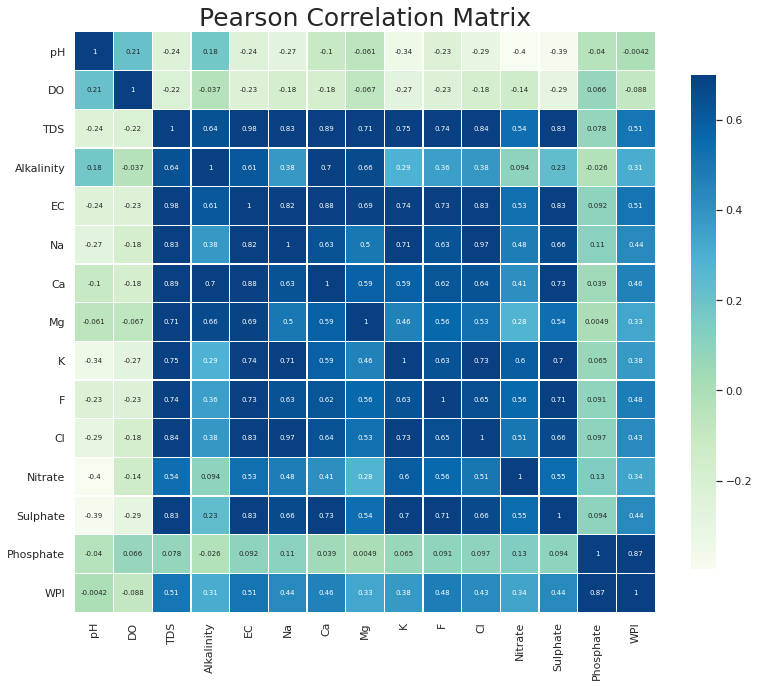

In [10]:
sns.set(style="whitegrid", font_scale=1)

plt.figure(figsize=(13,13))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(df.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',
            annot=True, annot_kws={"size":7}, cbar_kws={"shrink": .7})

In [11]:
wpi_corr = df.corr()['WPI'].sort_values(ascending=False)
print(wpi_corr)

WPI           1.000000
Phosphate     0.873994
EC            0.513956
TDS           0.508326
F             0.478907
Ca            0.462190
Sulphate      0.437575
Na            0.437277
Cl            0.432111
K             0.376962
Nitrate       0.342504
Mg            0.331117
Alkalinity    0.306938
pH           -0.004190
DO           -0.087564
Name: WPI, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


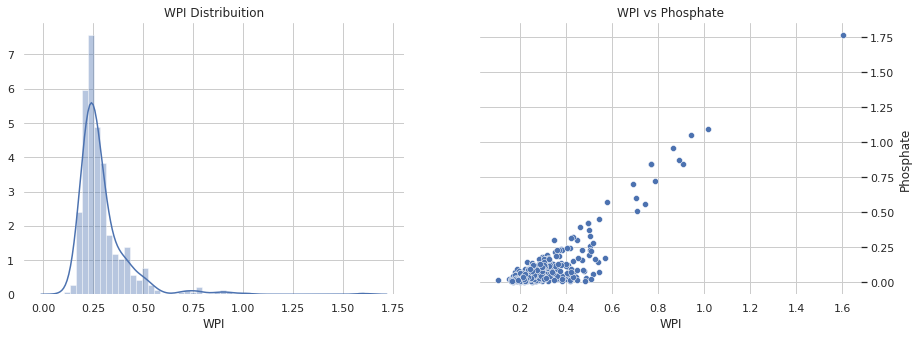

In [12]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.distplot(df['WPI'], ax=axes[0])
sns.scatterplot(x='WPI',y='Phosphate', data=df, ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='WPI', ylabel='', title='WPI Distribuition')
axes[1].set(xlabel='WPI', ylabel='Phosphate', title='WPI vs Phosphate')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

In [13]:
df = df.drop('Date',axis=1)

In [14]:
df.head()

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,8.14,8.7,84.0,52,147.8,4.48,44,20,1.17,0.285,7.8,0.758000,6.534660,0.06211,0.249528
1,7.70,8.8,110.0,76,188.0,8.61,44,36,3.46,0.401,14.8,0.196062,8.138620,0.00960,0.216400
2,7.60,7.5,75.0,44,128.0,8.11,28,20,2.80,0.379,14.8,0.298875,3.855625,0.01280,0.183814
3,8.20,9.1,76.0,56,127.0,6.30,44,18,1.65,0.396,9.6,0.299591,2.238750,0.01536,0.219282
4,7.31,7.3,84.0,52,140.0,5.50,28,20,1.61,0.265,8.3,0.106000,5.600000,0.01000,0.165831


In [15]:
# Features
X = df.drop('WPI',axis=1)

# Label
y = df['WPI']

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(339, 14)
(146, 14)
(339,)
(146,)


In [17]:
scaler = MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# everything has been scaled between 1 and 0
print('Max: ',X_train.max())
print('Min: ', X_train.min())

Max:  1.0000000000000002
Min:  0.0


In [18]:
model = Sequential()

# input layer
model.add(Dense(14,activation='relu'))

# hidden layers
model.add(Dense(14,activation='relu'))
model.add(Dense(14,activation='relu'))
model.add(Dense(14,activation='relu'))

# output layer
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [19]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
3/3 [==============================] - 1s 83ms/step - loss: 0.0886 - val_loss: 0.0957
Epoch 2/400
3/3 [==============================] - 0s 14ms/step - loss: 0.0690 - val_loss: 0.0777
Epoch 3/400
3/3 [==============================] - 0s 12ms/step - loss: 0.0533 - val_loss: 0.0632
Epoch 4/400
3/3 [==============================] - 0s 12ms/step - loss: 0.0408 - val_loss: 0.0521
Epoch 5/400
3/3 [==============================] - 0s 12ms/step - loss: 0.0316 - val_loss: 0.0433
Epoch 6/400
3/3 [==============================] - 0s 13ms/step - loss: 0.0245 - val_loss: 0.0360
Epoch 7/400
3/3 [==============================] - 0s 12ms/step - loss: 0.0188 - val_loss: 0.0301
Epoch 8/400
3/3 [==============================] - 0s 16ms/step - loss: 0.0146 - val_loss: 0.0255
Epoch 9/400
3/3 [==============================] - 0s 12ms/step - loss: 0.0118 - val_loss: 0.0221
Epoch 10/400
3/3 [==============================] - 0s 14ms/step - loss: 0.0100 - val_loss: 0.0201
Epoch 11/400
3/3 [=

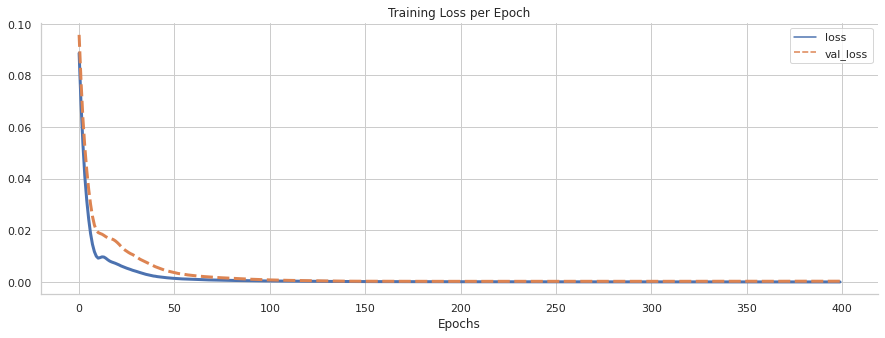

In [20]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

In [21]:
# predictions on the test set
predictions = model.predict(X_test)

print('MAE: ',mean_absolute_error(y_test,predictions))
print('MSE: ',mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))
print('Variance Regression Score: ',explained_variance_score(y_test,predictions))

print('\n\nDescriptive Statistics:\n',df['WPI'].describe())

MAE:  0.006987333171523265
MSE:  0.00032895634203599023
RMSE:  0.018137153636554722
Variance Regression Score:  0.9884954996156179


Descriptive Statistics:
 count    485.000000
mean       0.293930
std        0.132472
min        0.103531
25%        0.222014
50%        0.254719
75%        0.312652
max        1.604375
Name: WPI, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 0, 'Test True Y'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

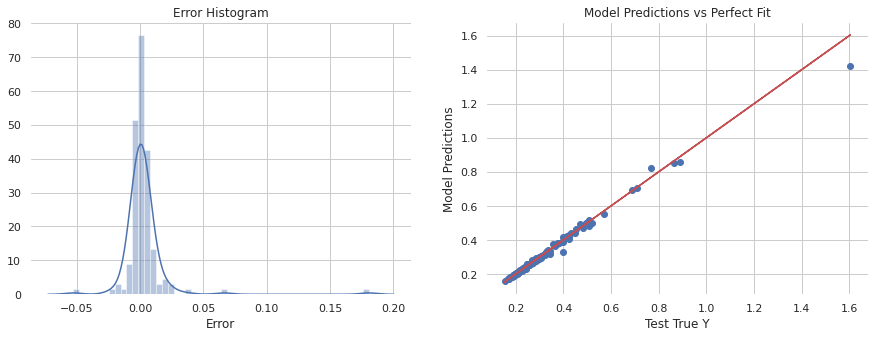

In [23]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

errors = y_test.values.reshape(146, 1) - predictions
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

In [27]:
# features of new data
first_data = df.drop('WPI',axis=1).iloc[0]
print(f'Features of new data:\n{first_data}')

# reshape the numpy array and scale the features
first_data = scaler.transform(first_data.values.reshape(-1, 14))

# run the model and get the price prediction
print('\nPrediction WPI:',model.predict(first_data)[0,0])

# original price
print('\nOriginal WPI:',df.iloc[0]['WPI'])

Features of new data:
pH              8.14000
DO              8.70000
TDS            84.00000
Alkalinity     52.00000
EC            147.80000
Na              4.48000
Ca             44.00000
Mg             20.00000
K               1.17000
F               0.28500
Cl              7.80000
Nitrate         0.75800
Sulphate        6.53466
Phosphate       0.06211
Name: 0, dtype: float64

Prediction WPI: 0.24549612

Original WPI: 0.24952772
